In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import json
from collections import OrderedDict
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [9]:
def asympRead(particle, cutoff, cfgname, prefix): 
    return pd.concat([pd.read_csv("output/{}.{}/data/{}/asymp-{:g}.dat".format(prefix, cfgname, particle, cutscale), header=None, names=["E", str(cutscale)], index_col=0)\
                      for cutscale in cutoff], axis=1)\
          ,pd.read_csv("output/{}.{}/data/{}/minE.dat".format(prefix, cfgname, particle), header=None, names=["cutscale", "E"], index_col=0)

In [10]:
def plotParticle(ax, pname, cfgname, prefix, window=[-np.inf, np.inf]):
    config = json.load(open("output/"+prefix+"."+cfgname+"/"+cfgname+".old.cfg"), object_pairs_hook = OrderedDict)
    data, peaks = asympRead(pname, config[pname]["cutscales"], cfgname, prefix)
    plotData = data.loc[(data.index > window[0]) & (data.index < window[1])].plot(marker="o", ls="", logy=True, ax=ax, title=pname+"("+"{:.5f}".format(2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0])+")")
    for line in ax.get_lines():
        color = line._get_markerfacecolor()
        pos = line.get_label()
        plotData.axvline(peaks.loc[float(pos)][0], ls="--", color=color)

In [11]:
def doPlots(cfgname, prefix, window=None):
    config = json.load(open("states/" + cfgname+".cfg"), object_pairs_hook=OrderedDict)
    fig, axes = plt.subplots(len(config), figsize=(plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]*len(config)))
    for i,pname in enumerate(config.keys()):
        plotParticle(axes[i], pname, cfgname, prefix, [-np.inf, np.inf] if window is None else config[pname]["eq"]["E"] + np.array([-window, window]))


In [12]:
def printCheck(cfgname, prefix):
    config = json.load(open("output/"+prefix+"."+cfgname+"/"+cfgname+".old.cfg"), object_pairs_hook=OrderedDict)
    for pname in config.keys():
        peaks = pd.read_csv("output/{}.{}/data/{}/minE.dat".format(prefix, cfgname, pname), header=None, names=["cutscale", "E"], index_col=0)
        print("{}({})".format(pname,peaks.iloc[-1][0]))
        print("peaks - peaks[-1]")
        print(peaks - peaks.iloc[-1])
        print("\n")
        print("peaks[i]-peaks[i-1]")
        print(peaks.diff())
        print("\n---\n")

In [17]:
def readMine(cfgname, prefix):
    config = json.load(open("output/"+prefix+"."+cfgname+"/"+cfgname+".old.cfg"), object_pairs_hook=OrderedDict)
    my = dict()
    for pname in config.keys():
        peaks = pd.read_csv("output/{}.{}/data/{}/minE.dat".format(prefix, cfgname, pname), header=None, names=["cutscale", "E"], index_col=0)
        my.update({pname: np.array([1000*(2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0])])})
    my = pd.DataFrame.from_dict(my, orient="index")
    my.columns = ["my("+prefix+")"]
    return my

# Charmonium

## Linear

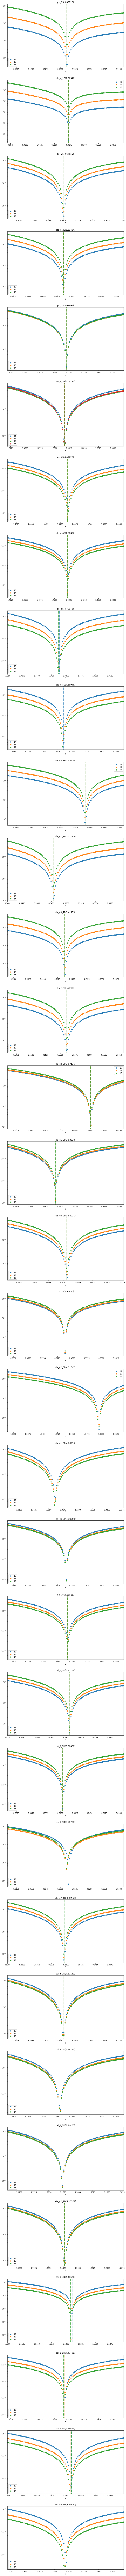

In [8]:
doPlots("c-lin", "lin")

In [9]:
printCheck("c-lin", "lin")

psi_1S(0.13109904444217998)
peaks - peaks[-1]
                     E
cutscale              
15        1.788140e-09
16        0.000000e+00
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
15                 NaN
16       -1.788140e-09
17        0.000000e+00

---

eta_c_1S(0.017404542578617)
peaks - peaks[-1]
                     E
cutscale              
15       -5.820996e-12
16       -1.163999e-12
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
15                 NaN
16        4.656997e-12
17        1.163999e-12

---

psi_2S(0.7125189762115501)
peaks - peaks[-1]
                     E
cutscale              
15       -9.536750e-09
16       -9.536750e-09
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
15                 NaN
16        0.000000e+00
17        9.536750e-09

---

eta_c_2S(0.668541015625)
peaks - peaks[-1]
                 E
cutscale          
15      

In [10]:
article = pd.read_csv("../data/charmonia.csv", index_col=0)
res = article.join(readMine("c-lin", "lin"))

In [11]:
compiled = res.join(\
    res["LP"].subtract(res["my(lin)"], axis=0).abs().rename("dev(lin)")\
).join(\
    res.subtract(res["my(lin)"], axis=0).abs().drop(["my(lin)"], axis=1).min(axis=1).rename("alldev(lin)")\
)\
.round({"dev(lin)": 3, "alldev(lin)": 3})\
.reindex_axis(["exp", "8", "11", "LP", "my(lin)", "dev(lin)", "alldev(lin)"], axis=1)

In [12]:
compiled.sort_values("alldev(lin)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin)
name,,,,,,,
eta_c2_3D,NaN,NaN,4326,4478,4478.000000,0.000,0.000
psi_1_2D,4191.0,4142.0,4089,4144,4144.000000,0.000,0.000
psi_1_1D,3778.0,3785.0,3787,3787,3787.000000,0.000,0.000
chi_c0_3P,NaN,4202.0,4131,4230,4230.000000,0.000,0.000
psi_3S,4040.0,4072.0,4022,4078,4078.046997,0.047,0.047
h_c_1P,3525.0,3516.0,3519,3522,3522.095215,0.095,0.095
psi_1S,3097.0,3090.0,3097,3097,3097.099044,0.099,0.099
chi_c0_2P,3918.0,3852.0,3842,3869,3869.113525,0.114,0.114
h_c_2P,NaN,3934.0,3908,3940,3939.843750,0.156,0.156


## Screening

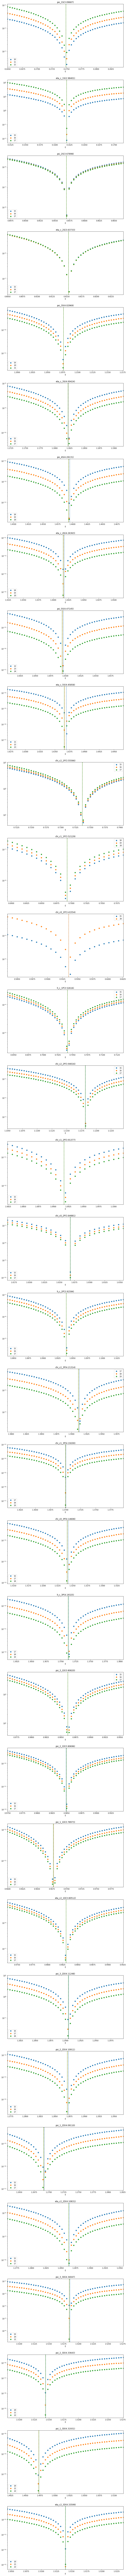

In [13]:
doPlots("c-scr", "scr", window=1E-2)

In [14]:
printCheck("c-scr", "scr")

psi_1S(0.27486915588379)
peaks - peaks[-1]
                     E
cutscale              
10        4.959106e-07
11        3.814697e-08
12        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
10                 NaN
11       -4.577637e-07
12       -3.814697e-08

---

eta_c_1S(0.16200779390335002)
peaks - peaks[-1]
                     E
cutscale              
15        7.152560e-09
16        2.384190e-09
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
15                 NaN
16       -4.768370e-09
17       -2.384190e-09

---

psi_2S(0.8569816894531199)
peaks - peaks[-1]
            E
cutscale     
15        0.0
16        0.0
17        0.0


peaks[i]-peaks[i-1]
            E
cutscale     
15        NaN
16        0.0
17        0.0

---

eta_c_2S(0.8153296327590899)
peaks - peaks[-1]
                     E
cutscale              
15        5.006791e-08
16        7.152560e-09
17        0.000000e+00


peaks[i]-peaks[i

In [15]:
article = pd.read_csv("../data/charmonia.csv", index_col=0)
res = article.join(readMine("c-scr", "scr"))

In [16]:
compiled = res.join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3})\
.reindex_axis(["exp", "8", "11", "SP", "my(scr)", "dev(scr)", "alldev(scr)"], axis=1)\

In [17]:
compiled.sort_values("dev(scr)")

,exp,8,11,SP,my(scr),dev(scr),alldev(scr)
name,,,,,,,
chi_c1_3P,NaN,4271.0,4178,4192,4191.996338,0.004,0.004
eta_c_1S,2984.0,2982.0,2979,2984,2984.007794,0.008,0.008
eta_c2_3D,NaN,NaN,4326,4336,4335.987574,0.012,0.012
psi_2S,3686.0,3672.0,3673,3679,3678.981689,0.018,0.018
psi_2_1D,3823.0,3800.0,3798,3807,3806.960938,0.039,0.039
h_c_2P,NaN,3934.0,3908,3916,3915.939880,0.060,0.060
chi_c0_3P,NaN,4202.0,4131,4146,4146.078125,0.078,0.078
psi_2_2D,NaN,4158.0,4100,4109,4109.114746,0.115,0.115
eta_c2_1D,NaN,3799.0,3796,3805,3805.117188,0.117,0.117


# Compiled charmonia

In [18]:
article = pd.read_csv("../data/charmonia.csv", index_col=0)
res = article.join(readMine("c-lin", "lin")).join(readMine("c-scr", "scr"))

In [19]:
compiled = res.join(\
    res["LP"].subtract(res["my(lin)"], axis=0).abs().rename("dev(lin)")\
).join(\
    res.subtract(res["my(lin)"], axis=0).abs().drop(["my(lin)"], axis=1).min(axis=1).rename("alldev(lin)")\
).join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3, "alldev(lin)": 3, "dev(lin)": 3})

compiled = compiled.join(\
    compiled["dev(lin)"].add(compiled["dev(scr)"]).rename("dev(tot)")\
)\
.join(\
    compiled["alldev(lin)"].add(compiled["alldev(scr)"]).rename("alldev(tot)")\
)\
.reindex_axis(["exp", "8", "11", "LP", "my(lin)", "dev(lin)", "alldev(lin)", "SP", "my(scr)", "dev(scr)", "alldev(scr)", "dev(tot)", "alldev(tot)"], axis=1)\

## description of columns
* my(lin), my(scr) - my results for linear and screened potential
* dev(lin), dev(scr) - deviation of my results from those represented in paper
* alldev(lin), alldev(scr) - minimum among deviations from: exp, 8, 11, LP(SP). columns shown in the article
* dev(tot) = dev(lin) + dev(scr)
* alldev(tot) = alldev(lin) + alldev(scr)

In [20]:
compiled.sort_values("alldev(tot)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
eta_c2_3D,NaN,NaN,4326,4478,4478.000000,0.000,0.000,4336,4335.987574,0.012,0.012,0.012,0.012
chi_c0_3P,NaN,4202.0,4131,4230,4230.000000,0.000,0.000,4146,4146.078125,0.078,0.078,0.078,0.078
h_c_2P,NaN,3934.0,3908,3940,3939.843750,0.156,0.156,3916,3915.939880,0.060,0.060,0.216,0.216
psi_1S,3097.0,3090.0,3097,3097,3097.099044,0.099,0.099,3097,3096.869156,0.131,0.131,0.230,0.230
h_c_1P,3525.0,3516.0,3519,3522,3522.095215,0.095,0.095,3526,3526.158691,0.159,0.159,0.254,0.254
psi_3S,4040.0,4072.0,4022,4078,4078.046997,0.047,0.047,4030,4029.685364,0.315,0.315,0.362,0.362
eta_c_1S,2984.0,2982.0,2979,2983,2983.404543,0.405,0.405,2984,2984.007794,0.008,0.008,0.413,0.413
eta_c2_1D,NaN,3799.0,3796,3806,3805.687500,0.312,0.312,3805,3805.117188,0.117,0.117,0.429,0.429
psi_2S,3686.0,3672.0,3673,3679,3678.518976,0.481,0.463,3679,3678.981689,0.018,0.018,0.499,0.481


In [21]:
compiled.sort_values("dev(scr)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
chi_c1_3P,NaN,4271.0,4178,4284,4282.125000,1.875,1.875,4192,4191.996338,0.004,0.004,1.879,1.879
eta_c_1S,2984.0,2982.0,2979,2983,2983.404543,0.405,0.405,2984,2984.007794,0.008,0.008,0.413,0.413
eta_c2_3D,NaN,NaN,4326,4478,4478.000000,0.000,0.000,4336,4335.987574,0.012,0.012,0.012,0.012
psi_2S,3686.0,3672.0,3673,3679,3678.518976,0.481,0.463,3679,3678.981689,0.018,0.018,0.499,0.481
psi_2_1D,3823.0,3800.0,3798,3807,3806.375000,0.625,0.586,3807,3806.960938,0.039,0.039,0.664,0.625
h_c_2P,NaN,3934.0,3908,3940,3939.843750,0.156,0.156,3916,3915.939880,0.060,0.060,0.216,0.216
chi_c0_3P,NaN,4202.0,4131,4230,4230.000000,0.000,0.000,4146,4146.078125,0.078,0.078,0.078,0.078
psi_2_2D,NaN,4158.0,4100,4165,4163.906250,1.094,1.094,4109,4109.114746,0.115,0.115,1.209,1.209
eta_c2_1D,NaN,3799.0,3796,3806,3805.687500,0.312,0.312,3805,3805.117188,0.117,0.117,0.429,0.429


In [22]:
compiled.sort_values("alldev(scr)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
chi_c1_3P,NaN,4271.0,4178,4284,4282.125000,1.875,1.875,4192,4191.996338,0.004,0.004,1.879,1.879
eta_c_1S,2984.0,2982.0,2979,2983,2983.404543,0.405,0.405,2984,2984.007794,0.008,0.008,0.413,0.413
eta_c2_3D,NaN,NaN,4326,4478,4478.000000,0.000,0.000,4336,4335.987574,0.012,0.012,0.012,0.012
psi_2S,3686.0,3672.0,3673,3679,3678.518976,0.481,0.463,3679,3678.981689,0.018,0.018,0.499,0.481
psi_2_1D,3823.0,3800.0,3798,3807,3806.375000,0.625,0.586,3807,3806.960938,0.039,0.039,0.664,0.625
h_c_2P,NaN,3934.0,3908,3940,3939.843750,0.156,0.156,3916,3915.939880,0.060,0.060,0.216,0.216
chi_c0_3P,NaN,4202.0,4131,4230,4230.000000,0.000,0.000,4146,4146.078125,0.078,0.078,0.078,0.078
psi_2_2D,NaN,4158.0,4100,4165,4163.906250,1.094,1.094,4109,4109.114746,0.115,0.115,1.209,1.209
eta_c2_1D,NaN,3799.0,3796,3806,3805.687500,0.312,0.312,3805,3805.117188,0.117,0.117,0.429,0.429


# Bottomonium

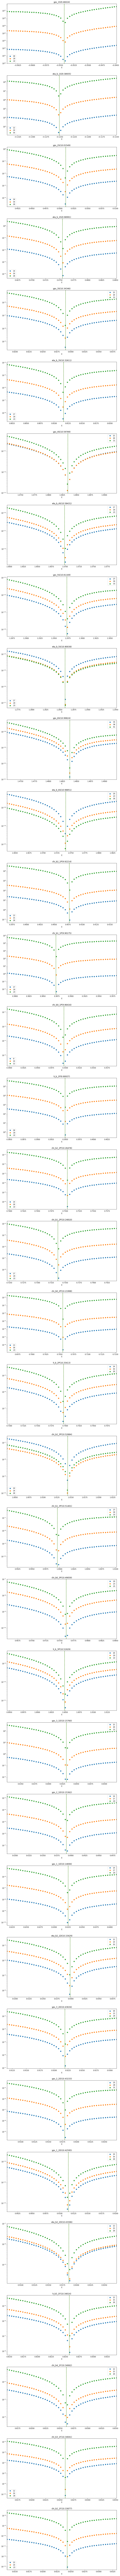

In [85]:
doPlots("b-scr", "scr")

In [86]:
printCheck("b-scr", "scr")

yps_1S(-0.05415514019839401)
peaks - peaks[-1]
                     E
cutscale              
18        4.376285e-08
20       -4.656599e-11
22        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
18                 NaN
20       -4.380941e-08
22        4.656599e-11

---

eta_b_1S(-0.12504942585072)
peaks - peaks[-1]
                     E
cutscale              
12        2.251480e-09
14       -5.820003e-11
16        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
12                 NaN
14       -2.309680e-09
16        5.820003e-11

---

yps_2S(0.50108606913071)
peaks - peaks[-1]
                     E
cutscale              
14       -1.071000e-10
16        4.660050e-12
18        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
16        1.117600e-10
18       -4.660050e-12

---

eta_b_2S(0.4755119520263)
peaks - peaks[-1]
                     E
cutscale              


In [87]:
article = pd.read_csv("../data/bottomonia.csv", index_col=0)
res = article.join(readMine("b-scr", "scr"))

In [88]:
compiled = res.join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3})\
.reindex_axis(["PDG", "SNR", "GI", "NR", "SP", "my(scr)", "dev(scr)", "alldev(scr)"], axis=1)\

## description of columns
* my(scr) - my results for screened potential
* dev(scr) - deviation of my results from those represented in paper
* alldev(scr) - minimum among deviations from: PDG, SNR, GI, NR, SP; columns shown in the article

In [89]:
compiled.sort_values("alldev(scr)")

,PDG,SNR,GI,NR,SP,my(scr),dev(scr),alldev(scr)
name,,,,,,,,
chi_b0_2P,10233.0,10226.0,10226,10221.0,10220,10219.982833,0.017,0.017
eta_b_2S,9999.0,9987.0,9976,9990.0,9990,9989.911952,0.088,0.088
eta_b_3S,NaN,10330.0,10336,10330.0,10326,10326.107447,0.107,0.107
h_b_2P,10260.0,10256.0,10250,10240.0,10254,10254.130290,0.130,0.130
chi_b0_1P,9859.0,9865.0,9847,9855.0,9864,9864.163686,0.164,0.164
yps_1S,9460.0,9460.0,9465,9502.0,9460,9460.244860,0.245,0.245
h_b_3P,NaN,10529.0,10541,10516.0,10519,10519.292518,0.293,0.293
eta_b_4S,NaN,10595.0,10623,NaN,10584,10584.305243,0.305,0.305
yps_2_2D,NaN,10438.0,10449,10418.0,10432,10432.325583,0.326,0.326


# Test

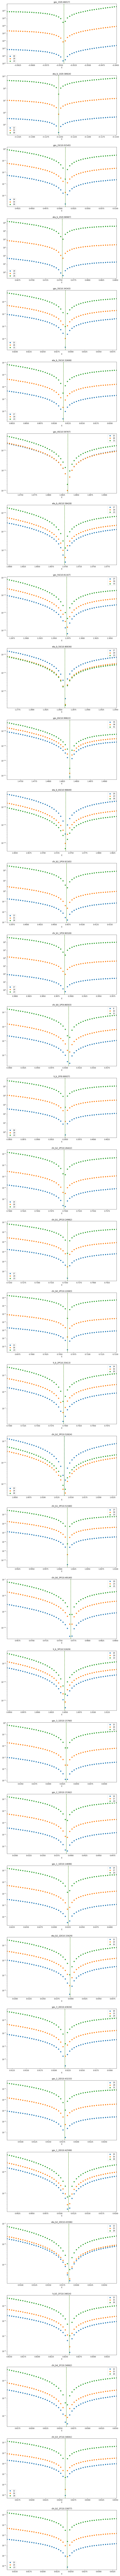

In [15]:
doPlots("b-scr.new", "scr")

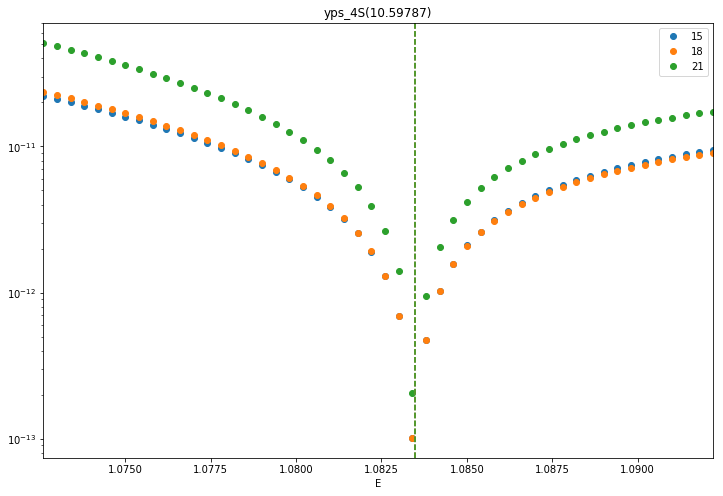

In [67]:
plotParticle(plt.gca(), "yps_4S", "b-scr.new", "scr")

In [18]:
article = pd.read_csv("../data/bottomonia.csv", index_col=0)
res = article.join(readMine("b-scr.new", "scr"))

In [19]:
compiled = res.join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3})\
.reindex_axis(["PDG", "SNR", "GI", "NR", "SP", "my(scr)", "dev(scr)", "alldev(scr)"], axis=1)\

In [20]:
compiled.sort_values("dev(scr)")

,PDG,SNR,GI,NR,SP,my(scr),dev(scr),alldev(scr)
name,,,,,,,,
eta_b_3S,NaN,10330.0,10336,10330.0,10326,10326.077418,0.077,0.077
h_b_2P,10260.0,10256.0,10250,10240.0,10254,10254.130289,0.130,0.130
eta_b_2S,9999.0,9987.0,9976,9990.0,9990,9989.869643,0.130,0.130
yps_1S,9460.0,9460.0,9465,9502.0,9460,9460.171083,0.171,0.171
chi_b2_2P,10269.0,10269.0,10261,10264.0,10264,10264.217292,0.217,0.217
chi_b2_3P,NaN,10540.0,10550,10521.0,10528,10528.239041,0.239,0.239
chi_b1_1P,9893.0,9897.0,9876,9874.0,9903,9903.278302,0.278,0.278
eta_b_4S,NaN,10595.0,10623,NaN,10584,10584.280810,0.281,0.281
h_b_3P,NaN,10529.0,10541,10516.0,10519,10519.292517,0.293,0.293
